In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('Derma_after_LDA.csv')
dataset

,LDA1,LDA2,LDA3,LDA4,LDA5,class
0,-3.421833,-1.357899,-2.102069,-4.393591,2.211383,2
1,-4.951997,3.481079,2.789392,1.014278,1.068968,1
2,17.111107,-0.014091,1.022227,-0.648383,0.656795,3
3,-4.749688,4.228836,2.567761,1.219129,-0.080985,1
4,16.130449,0.861963,1.623168,-0.357001,-0.659607,3
5,-3.722888,-0.186687,-1.126555,-4.563976,1.802943,2
6,-2.059663,-3.408257,-7.339746,6.032804,0.196030,5
7,15.088087,0.732032,0.864929,-1.597130,-1.402702,3
8,-3.636433,-0.888843,-1.616164,-4.199996,-2.917807,4
9,-3.084236,-0.828589,-2.091168,-4.470187,-1.789855,4


In [4]:
dataset.isnull().sum()
print(dataset.isnull().sum())

LDA1     0
LDA2     0
LDA3     0
LDA4     0
LDA5     0
class    0
dtype: int64


In [5]:
# iterating the columns 
for col in dataset.columns: 
    print(col)

LDA1
LDA2
LDA3
LDA4
LDA5
class


In [7]:
X = dataset.iloc[:, 0:5].values
x = dataset.iloc[:, 0:5]
y = dataset.iloc[:, 5].values
y_name = dataset.iloc[:, 5:6]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (366, 5)
y shape: (366, 1)


In [8]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

LDA1
LDA2
LDA3
LDA4
LDA5


Class:
class


In [9]:
dataset.corr

<bound method DataFrame.corr of           LDA1       LDA2       LDA3      LDA4      LDA5  class
0    -3.421833  -1.357899  -2.102069 -4.393591  2.211383      2
1    -4.951997   3.481079   2.789392  1.014278  1.068968      1
2    17.111107  -0.014091   1.022227 -0.648383  0.656795      3
3    -4.749688   4.228836   2.567761  1.219129 -0.080985      1
4    16.130449   0.861963   1.623168 -0.357001 -0.659607      3
5    -3.722888  -0.186687  -1.126555 -4.563976  1.802943      2
6    -2.059663  -3.408257  -7.339746  6.032804  0.196030      5
7    15.088087   0.732032   0.864929 -1.597130 -1.402702      3
8    -3.636433  -0.888843  -1.616164 -4.199996 -2.917807      4
9    -3.084236  -0.828589  -2.091168 -4.470187 -1.789855      4
10   -4.885673   3.050158   2.571321  1.766280 -0.557967      1
11   -3.806630  -0.645693  -1.506257 -3.927127  3.117444      2
12   -4.012045  -0.236007  -1.131922 -4.090832  2.767419      2
13   -5.088500   3.674034   2.905750  1.544383  0.686630      1
14   18.

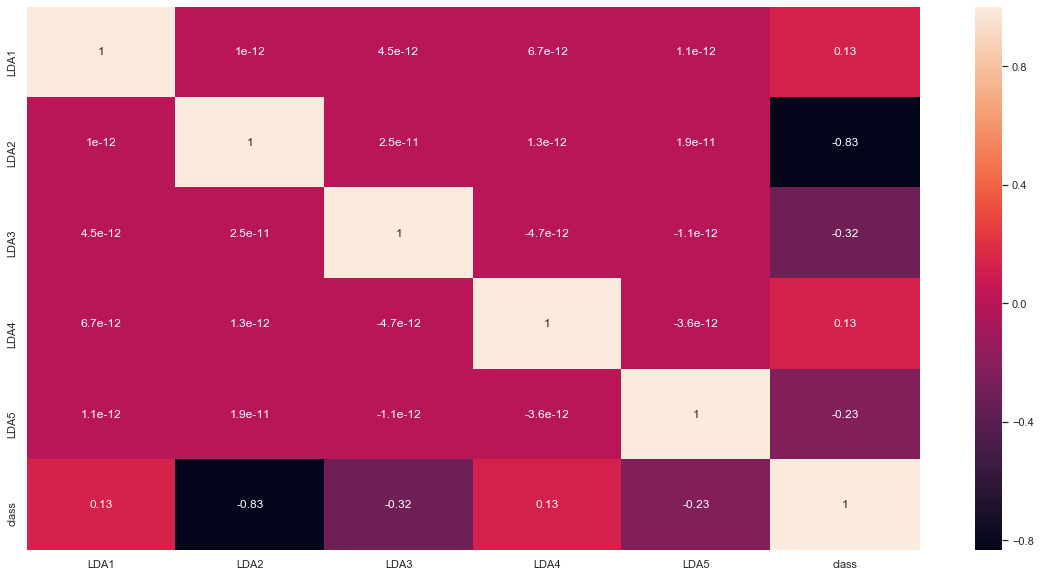

In [10]:
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)

In [25]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [26]:
X_train
X_test

array([[-3.59847788e+00, -8.91310025e-01, -1.72447032e+00,
        -3.71267987e+00,  1.88040032e+00],
       [-3.26985357e+00, -1.17860235e+00, -2.06311570e+00,
        -4.38386025e+00, -1.91306910e+00],
       [-3.44871974e+00, -9.55377282e-01, -2.18932789e+00,
        -3.81351616e+00,  1.73449947e+00],
       [ 1.86244140e+01,  4.15707410e-01,  1.00134855e+00,
        -1.67449475e-01,  8.82963261e-01],
       [-3.47293168e+00, -1.05469458e+00, -2.00988403e+00,
        -4.92610509e+00, -1.24388041e+00],
       [-3.73215937e+00, -8.00400474e-01, -1.43408166e+00,
        -4.32735817e+00,  3.75772364e+00],
       [-4.29579326e+00,  3.22029324e+00,  1.81449444e+00,
         2.22631842e+00, -9.50084822e-01],
       [-5.08605197e+00,  4.19157511e+00,  3.77518298e+00,
         1.63882888e+00, -1.69718526e-01],
       [ 1.50750220e+01,  4.54313833e-01,  5.19808770e-01,
         3.88695981e-01, -7.54686991e-01],
       [ 1.61309984e+01,  7.09409181e-01,  8.38707756e-01,
         2.42410136e-01

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')

In [55]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [56]:
y_pred_knn = classifier_knn.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)


[[28  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0 27  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0  6]]


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
ac  = accuracy_score(y_test, y_pred_knn)
pre = precision_score(y_test, y_pred_knn, average='weighted')
re  = recall_score(y_test, y_pred_knn, average='weighted')
f1  = f1_score(y_test, y_pred_knn, average='weighted')
mc  = matthews_corrcoef(y_test, y_pred_knn)  

In [59]:
np.set_printoptions()
print("Akurasi =", ac)
print("Presisi =",pre)
print("Recall =", re)
print("F1 =", f1)
print("MCC =", mc)

Akurasi = 1.0
Presisi = 1.0
Recall = 1.0
F1 = 1.0
MCC = 1.0


In [60]:
print(ac)
print(pre)
print(re)
print(f1)
print(mc)

1.0
1.0
1.0
1.0
1.0


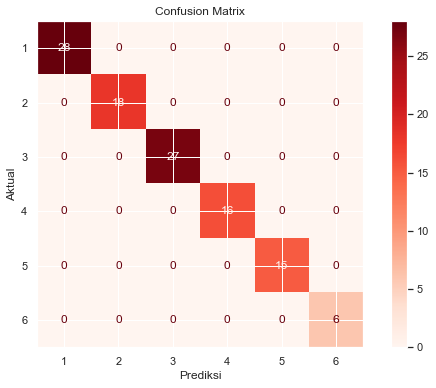

In [61]:
matrix = plot_confusion_matrix(classifier_knn, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.gcf().axes[0].tick_params
plt.gcf().axes[1].tick_params
plt.gcf().set_size_inches(10,6)
plt.show()

In [62]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rata-rata')

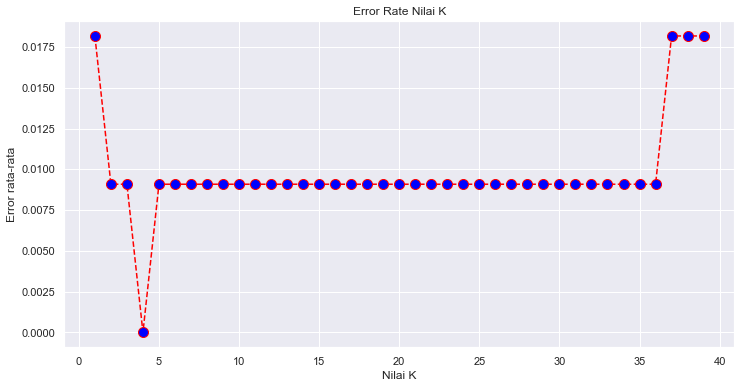

In [53]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')